# Image Classification Example

In this notebook, we will train a CNN model to classify the health state of mice. The CNN is the most common architecture for classification tasks in almost all field of imaging. It was introduced for classification of handwritten digit in 1998 and we will adopt it for our experiments in this notebook.


In [0]:
# syncing colab with our google account
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# syncing notebook with our google drive
!mkdir -p drive
!google-drive-ocamlfuse drive


In [0]:
# importing required library packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
import time
import os
import pickle
os.chdir('drive/NEUBIAS')

Using TensorFlow backend.


## Data pre-processing

First, we load the data-set. 

For your convinience, we provide this data already as pickle volumes. You can
download it with this link https://uabox.univ-angers.fr/index.php/s/fvflmGoFLOom9GK.

Then, we pre-process the training data with normalizeing them to be between 0 and 1

In [0]:
# Loading Training Data
# load the microscopy data from file using pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
# Loading Testing Data
# load the microscopy data from file using pickle
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

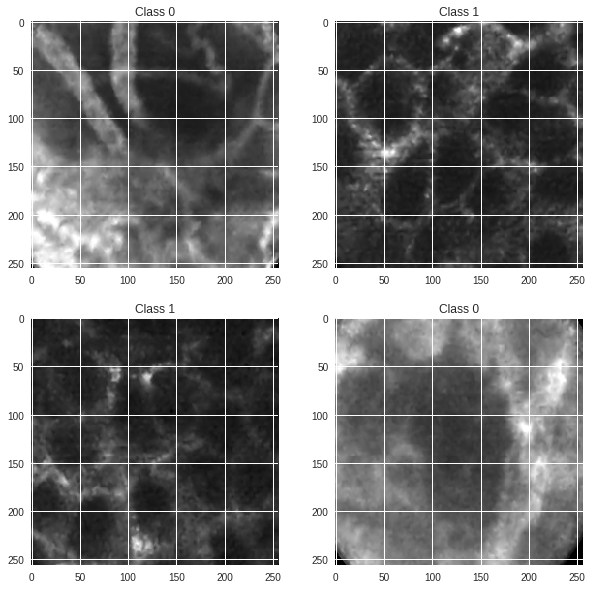

In [0]:
# first, we have a look at the data and the labels
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax=plt.subplot(221)
plt.imshow(X[0,:,:,0], cmap=plt.get_cmap('gray'))
ax.set_title('Class ' + str(y[0]))
ax=plt.subplot(222)
ax.set_title('Class ' + str(y[10]))
plt.imshow(X[10, :, :, 0], cmap=plt.get_cmap('gray'))
ax=plt.subplot(223)
ax.set_title('Class ' + str(y[100]))
plt.imshow(X[100, :, :, 0], cmap=plt.get_cmap('gray'))
ax=plt.subplot(224)
ax.set_title('Class ' + str(y[300]))
plt.imshow(X[300, :, :, 0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
# map to [0, 1]
X = X/255.0
X_test=X_test/255.0

In [0]:
# We check the format and the size of the data to be ready for feeding to the model. 
# Data should be in the following format for a CNN model in keras 
# (No. of samples, hight of images, width of images, No. of channel)
X.shape[0:]

(1354, 256, 256, 1)

#CNN model

For this model we use 5 conv layers plus two FC layers and a output (softmax) layer.
###First and second conv layers :
16 filters of size 3 $\times$ 3 plus a Relu layer as an activation function followed by a maxpooling layer.
###Third to fifth conv layers :
32 filters of size 3 $\times$ 3 plus a Relu layer as an activation function followed by a maxpooling layer

### Flaten feature maps

### First and second FC layers
64 neurons

### Output layer
2 neurons corresponding to the number of classes

In [0]:
model = Sequential()

model.add(Conv2D(16, (3, 3),padding='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
activation_7 (Activation)    (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)        4640      
__________

#Training

We use Cross Entropy averaged over pixels as training loss.
This loss function is similar to the cross entropy loss. In the other hand, the accuracy metric is used to show the ratio of the correct classifid sample over all samples of our database

In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# saving the log and show it by tensorboard
!pip install tensorboardcolab

from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://0a042f33.ngrok.io


In [0]:
# Fiting the model 
model.fit(X, y, 
          validation_split=0.3,
          epochs=10, batch_size=50,
          verbose=1,
          callbacks=[TensorBoardColabCallback(tbc)])

Train on 947 samples, validate on 407 samples
Epoch 1/10
947/947 [==============================] - 6s 6ms/step - loss: 0.6487 - acc: 0.6262 - val_loss: 0.5257 - val_acc: 0.7813
Epoch 2/10
947/947 [==============================] - 2s 2ms/step - loss: 0.5681 - acc: 0.7497 - val_loss: 0.4186 - val_acc: 0.8157
Epoch 3/10
947/947 [==============================] - 2s 2ms/step - loss: 0.4721 - acc: 0.8015 - val_loss: 0.4379 - val_acc: 0.8034
Epoch 4/10
947/947 [==============================] - 2s 2ms/step - loss: 0.3706 - acc: 0.8427 - val_loss: 0.3742 - val_acc: 0.8452
Epoch 5/10
947/947 [==============================] - 2s 2ms/step - loss: 0.2704 - acc: 0.8881 - val_loss: 0.2486 - val_acc: 0.8968
Epoch 6/10
947/947 [==============================] - 2s 2ms/step - loss: 0.1704 - acc: 0.9366 - val_loss: 0.1736 - val_acc: 0.9582
Epoch 7/10
947/947 [==============================] - 2s 2ms/step - loss: 0.1151 - acc: 0.9567 - val_loss: 0.2891 - val_acc: 0.8722
Epoch 8/10
947/947 [==========

In [0]:
# saving the model
model.save('Model_for_weeds')

In [0]:
# test the trained model on a database with labels
model.evaluate(x=X_test, y=y_test, batch_size=50, verbose=1)

802/802 [==============================] - 1s 1ms/step


[2.1319474570471746, 0.5286783035705215]

In [0]:
# test the trained model on a database without labels in order to predict a lable for each image
model.predict_classes(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,